<a href="https://colab.research.google.com/github/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/AnalisesPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile

import warnings
warnings.filterwarnings('ignore')

In [8]:
#@title
#dfESCOLA = pd.read_csv('https://github.com/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')
#dfESCOLA.drop([0],inplace=True) #primeira linha ta entrando com os nomes do index 'mean'(vindo da criaçao da tabela no arquivo 'ProjetoICD_OrganizacaoDadosTemporal.ipynb')
dfESCOLA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DadosEnem/ENEM_PB_1998_2019.csv',sep=',')
dfESCOLA['Internet'] = np.where(dfESCOLA['Internet'] == 0, "Não", "Sim")
dfESCOLA['Computador'] = np.where(dfESCOLA['Computador'] == 0, "Não", "Sim")
dfESCOLA['Celular'] = np.where(dfESCOLA['Celular'] == 0, "Não", "Sim")

dfESCOLA.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,NU_NOTA_OBJETIVA,NU_MEDIA_GERAL
0,190001037515,2019,2507507.0,JOÃO PESSOA,25.0,PB,22.0,M,Parda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pós-Graduação,Pós-Graduação,1.0,>30,Sim,Sim,Sim,NaN,NaN
1,190001125426,2019,2504009.0,CAMPINA GRANDE,25.0,PB,19.0,M,Branca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fundamental Incompleto,Ensino Médio Completo,4.0,<1,Sim,Não,Sim,NaN,NaN
2,190001141066,2019,2516607.0,TAVARES,25.0,PB,21.0,F,Parda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,620.7,654.7,607.4,831.4,Inglês,1,160.0,180.0,200.0,160.0,160.0,920.0,Ensino Médio Completo,Pós-Graduação,4.0,2-5,Sim,Sim,Sim,678.6,799.3
3,190001141273,2019,2502409.0,BONITO DE SANTA FÉ,25.0,PB,36.0,M,Parda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fundamental Incompleto,Fundamental Completo,4.0,1-2,Sim,Não,Sim,NaN,NaN
4,190001165087,2019,2514503.0,SÃO JOSÉ DE PIRANHAS,25.0,PB,20.0,F,Não declarado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ensino Médio Completo,4.0,<1,Sim,Não,Sim,NaN,NaN


#**PERFIL DOS INSCRITOS**

##**Número de Inscritos por Categoria**

Text(0, 0.5, 'Possui Internet?')

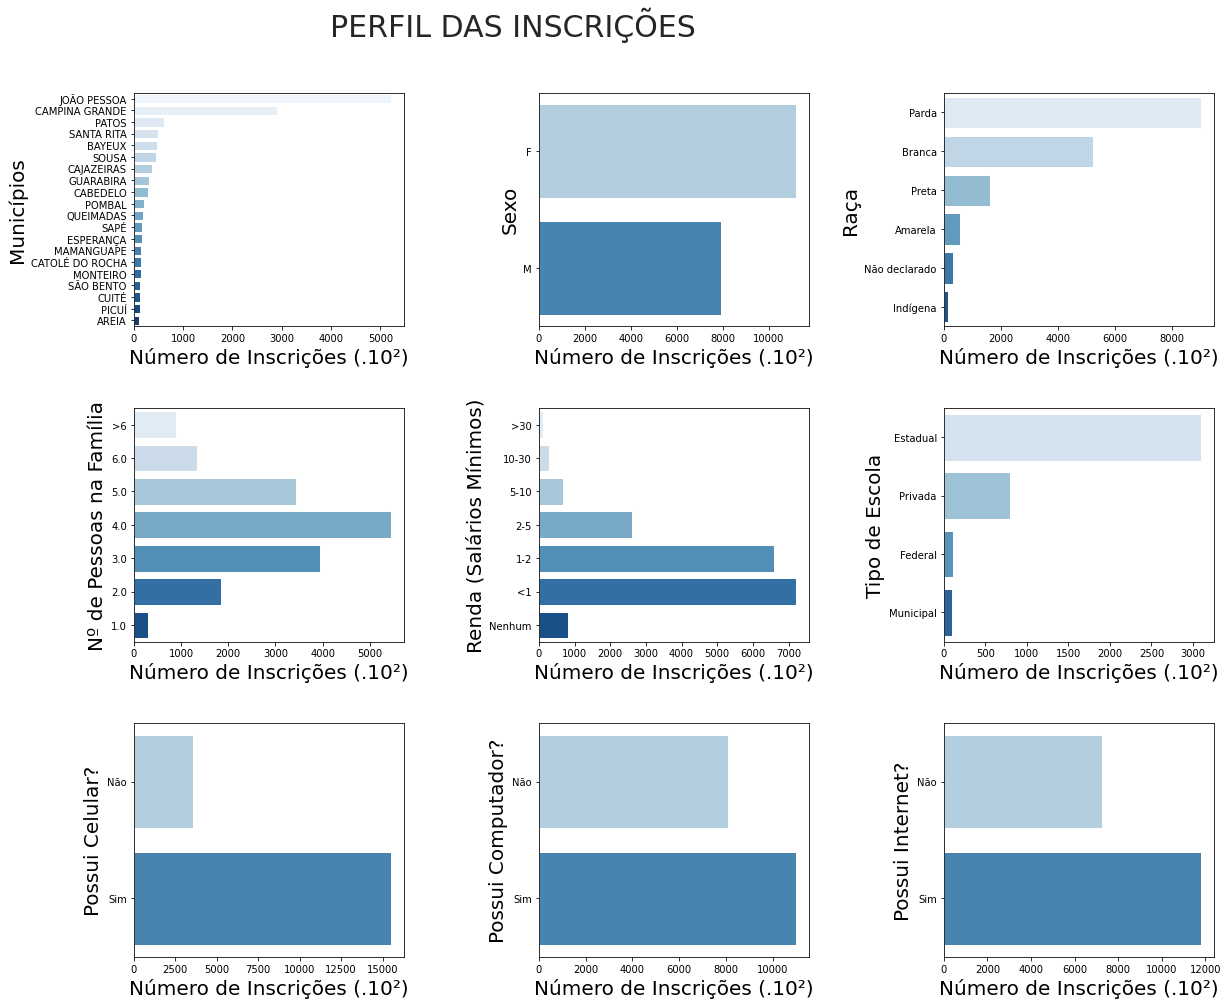

In [9]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle('    PERFIL DAS INSCRIÇÕES', fontsize=30)

# Distancia entre os subplots
plt.subplots_adjust(left=0.3,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)
#MUNICIPIO ==============================================================================================================
N_municipio=dfESCOLA.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
N_municipio['NU_INSCRICAO']=N_municipio['NU_INSCRICAO']/100
N_municipio.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio['Porcentagem']=N_municipio['NU_INSCRICAO']/N_municipio['NU_INSCRICAO'].sum()*100

mais_inscritos = N_municipio.head(20)
sns.barplot(ax=axes[0, 0], y ='NO_MUNICIPIO_RESIDENCIA', x ='NU_INSCRICAO', palette = 'Blues', data = mais_inscritos)
axes[0,0].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[0,0].set_ylabel('Municípios', fontsize=20)

#SEXO =================================================================================================================
sexo=dfESCOLA.groupby(by=['TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
sexo['NU_INSCRICAO']=sexo['NU_INSCRICAO']/100
sexo.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
sexo['Porcentagem']=sexo['NU_INSCRICAO']/sexo['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[0, 1], y ='TP_SEXO', x ='NU_INSCRICAO', palette = 'Blues',data = sexo)
axes[0,1].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[0,1].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
raca=dfESCOLA.groupby(by=['TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
raca['NU_INSCRICAO']=raca['NU_INSCRICAO']/100
raca.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
raca['Porcentagem']=raca['NU_INSCRICAO']/raca['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[0, 2], y ='TP_COR_RACA', x ='NU_INSCRICAO', palette = 'Blues', data = raca)
axes[0,2].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[0,2].set_ylabel('Raça', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
dfESCOLA['NP'] = np.where(dfESCOLA['NPessoas'] > 6, ">6", dfESCOLA['NPessoas'] )
nPessoas=dfESCOLA.groupby(by=['NP'], as_index=False)['NU_INSCRICAO'].count()
nPessoas['NU_INSCRICAO']=nPessoas['NU_INSCRICAO']/100
nPessoas['Porcentagem']=nPessoas['NU_INSCRICAO']/nPessoas['NU_INSCRICAO'].sum()*100

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='NU_INSCRICAO', palette = 'Blues',order=order, data = nPessoas)
axes[1,0].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
renda=dfESCOLA.groupby(by=['Renda'], as_index=False)['NU_INSCRICAO'].count()
renda['NU_INSCRICAO']=renda['NU_INSCRICAO']/100
renda['Porcentagem']=renda['NU_INSCRICAO']/renda['NU_INSCRICAO'].sum()*100

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='NU_INSCRICAO', palette = 'Blues',order=order, data = renda)
axes[1,1].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=dfESCOLA.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
tipEsc['NU_INSCRICAO']=tipEsc['NU_INSCRICAO']/100
tipEsc['Porcentagem'] = tipEsc['NU_INSCRICAO']/tipEsc['NU_INSCRICAO'].sum()*100

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[1, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='NU_INSCRICAO', palette = 'Blues', order=order, data = tipEsc)
axes[1,2].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[1,2].set_ylabel('Tipo de Escola', fontsize=20)


#CELULAR ================================================================================================================================
cel=dfESCOLA.groupby(by=['Celular'], as_index=False)['NU_INSCRICAO'].count()
cel['NU_INSCRICAO']=cel['NU_INSCRICAO']/100
cel['Porcentagem'] = cel['NU_INSCRICAO']/cel['NU_INSCRICAO'].sum()*100

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='NU_INSCRICAO', palette = 'Blues', data = cel)
axes[2,0].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
comp=dfESCOLA.groupby(by=['Computador'], as_index=False)['NU_INSCRICAO'].count()
comp['NU_INSCRICAO']=comp['NU_INSCRICAO']/100
comp['Porcentagem'] = comp['NU_INSCRICAO']/comp['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[2, 1], y ='Computador', x ='NU_INSCRICAO', palette = 'Blues', data = comp)
axes[2,1].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
intern=dfESCOLA.groupby(by=['Internet'], as_index=False)['NU_INSCRICAO'].count()
intern['NU_INSCRICAO']=intern['NU_INSCRICAO']/100
intern['Porcentagem'] = intern['NU_INSCRICAO']/intern['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[2, 2], y ='Internet', x ='NU_INSCRICAO', palette = 'Blues', data = intern)
axes[2,2].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

##**Inscrições no Tempo**

Text(0.5, 1.0, 'Possui Internet?')

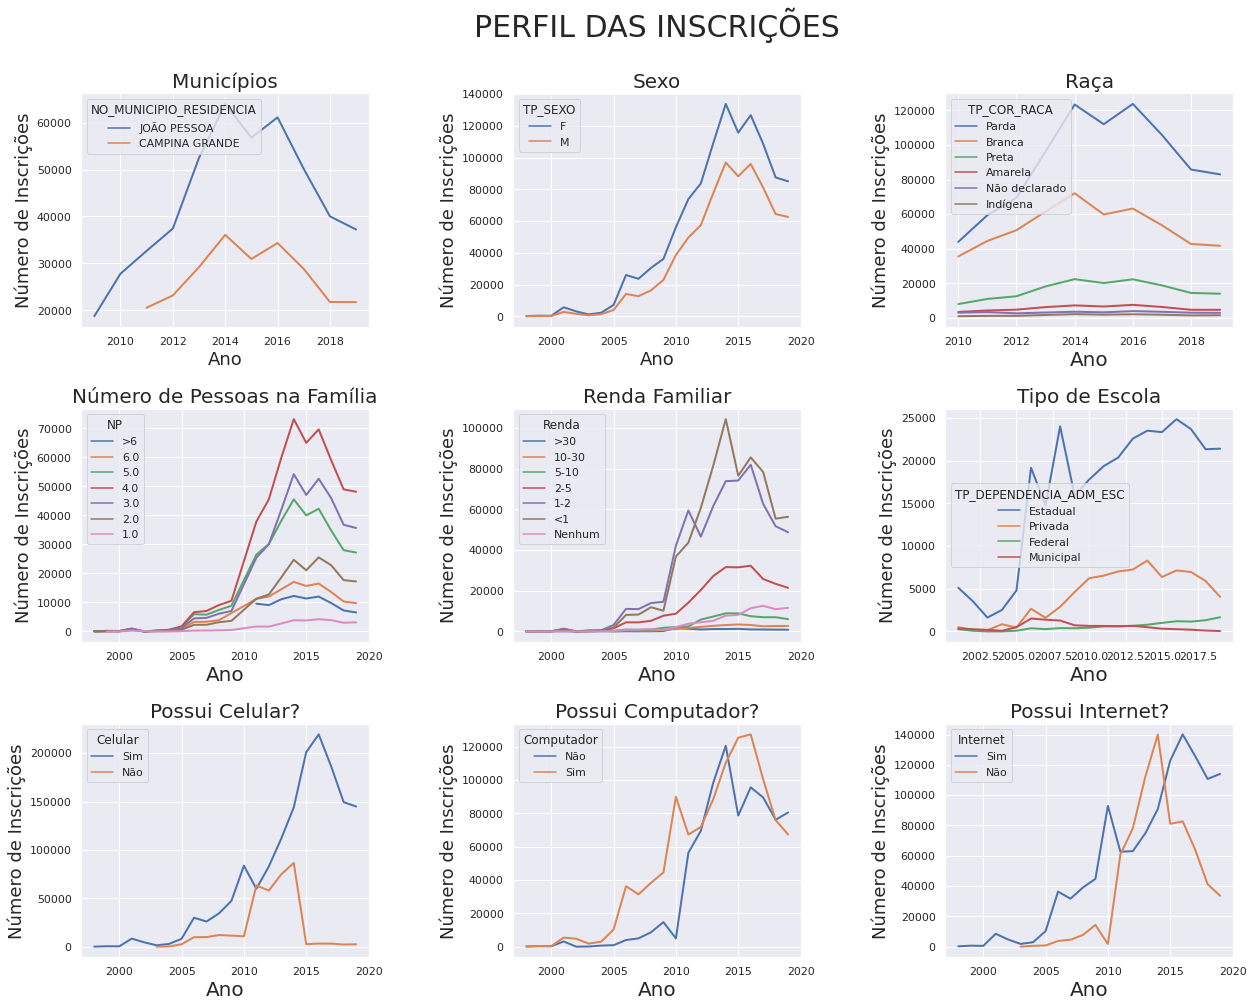

In [59]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.set_style("white")
sns.set(font_scale=1)

# Distancia entre os subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

fig.suptitle('PERFIL DAS INSCRIÇÕES', fontsize=30)

#MUNICIPIO ==============================================================================================================
N_municipio=dfESCOLA.groupby(by=['NU_ANO','NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
N_municipio.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio['Porcentagem']=N_municipio['NU_INSCRICAO']/N_municipio['NU_INSCRICAO'].sum()*100

mais_inscritos = N_municipio.head(20)
sns.lineplot(ax=axes[0, 0], x='NU_ANO', hue ='NO_MUNICIPIO_RESIDENCIA', y ='NU_INSCRICAO', linewidth = 2, data = mais_inscritos)
axes[0,0].set_xlabel('Ano', fontsize=18)
axes[0,0].set_ylabel('Número de Inscrições', fontsize=18)
axes[0,0].set_title('Municípios', fontsize=20)

#SEXO =================================================================================================================
sexo=dfESCOLA.groupby(by=['NU_ANO','TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
sexo.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
sexo['Porcentagem']=sexo['NU_INSCRICAO']/sexo['NU_INSCRICAO'].sum()*100

sns.lineplot(ax=axes[0, 1], x='NU_ANO', hue ='TP_SEXO', y ='NU_INSCRICAO',linewidth = 2,data = sexo)
axes[0,1].set_xlabel('Ano', fontsize=18)
axes[0,1].set_ylabel('Número de Inscrições', fontsize=18)
axes[0,1].set_title('Sexo', fontsize=20)

#RAÇA =================================================================================================================
raca=dfESCOLA.groupby(by=['NU_ANO','TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
raca.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
raca['Porcentagem']=raca['NU_INSCRICAO']/raca['NU_INSCRICAO'].sum()*100

sns.lineplot(ax=axes[0, 2], x='NU_ANO', hue ='TP_COR_RACA', y ='NU_INSCRICAO', linewidth = 2, data = raca)
axes[0,2].set_xlabel('Ano', fontsize=20)
axes[0,2].set_ylabel('Número de Inscrições', fontsize=18)
axes[0,2].set_title('Raça', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
nPessoas=dfESCOLA.groupby(by=['NU_ANO','NP'], as_index=False)['NU_INSCRICAO'].count()
nPessoas['Porcentagem']=nPessoas['NU_INSCRICAO']/nPessoas['NU_INSCRICAO'].sum()*100

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.lineplot(ax=axes[1, 0], x ='NU_ANO', hue ='NP', y ='NU_INSCRICAO',hue_order=order, linewidth = 2, data = nPessoas)
axes[1,0].set_xlabel('Ano', fontsize=20)
axes[1,0].set_ylabel('Número de Inscrições', fontsize=18)
axes[1,0].set_title('Número de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
renda=dfESCOLA.groupby(by=['NU_ANO','Renda'], as_index=False)['NU_INSCRICAO'].count()
renda['Porcentagem']=renda['NU_INSCRICAO']/renda['NU_INSCRICAO'].sum()*100

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.lineplot(ax=axes[1, 1], x='NU_ANO', hue ='Renda', y ='NU_INSCRICAO', linewidth = 2,hue_order=order, data = renda)
axes[1,1].set_xlabel('Ano', fontsize=20)
axes[1,1].set_ylabel('Número de Inscrições', fontsize=18)
axes[1,1].set_title('Renda Familiar', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=dfESCOLA.groupby(by=['NU_ANO','TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
tipEsc['Porcentagem'] = tipEsc['NU_INSCRICAO']/tipEsc['NU_INSCRICAO'].sum()*100

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.lineplot(ax=axes[1, 2], x='NU_ANO', hue ='TP_DEPENDENCIA_ADM_ESC', y='NU_INSCRICAO', linewidth = 2, hue_order=order, data = tipEsc)
axes[1,2].set_xlabel('Ano', fontsize=20)
axes[1,2].set_ylabel('Número de Inscrições', fontsize=18)
axes[1,2].set_title('Tipo de Escola', fontsize=20)


#CELULAR ================================================================================================================================
cel=dfESCOLA.groupby(by=['NU_ANO','Celular'], as_index=False)['NU_INSCRICAO'].count()
cel['Porcentagem'] = cel['NU_INSCRICAO']/cel['NU_INSCRICAO'].sum()*100

sns.lineplot(ax=axes[2, 0], x='NU_ANO', hue ='Celular', y ='NU_INSCRICAO',  linewidth = 2, data = cel)
axes[2,0].set_xlabel('Ano', fontsize=20)
axes[2,0].set_ylabel('Número de Inscrições', fontsize=18)
axes[2,0].set_title('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
comp=dfESCOLA.groupby(by=['NU_ANO','Computador'], as_index=False)['NU_INSCRICAO'].count()
comp['Porcentagem'] = comp['NU_INSCRICAO']/comp['NU_INSCRICAO'].sum()*100

sns.lineplot(ax=axes[2, 1], x='NU_ANO', hue ='Computador', y ='NU_INSCRICAO', linewidth = 2, data = comp)
axes[2,1].set_xlabel('Ano', fontsize=20)
axes[2,1].set_ylabel('Número de Inscrições', fontsize=18)
axes[2,1].set_title('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
intern=dfESCOLA.groupby(by=['NU_ANO','Internet'], as_index=False)['NU_INSCRICAO'].count()
intern['Porcentagem'] = intern['NU_INSCRICAO']/intern['NU_INSCRICAO'].sum()*100

sns.lineplot(ax=axes[2, 2], x='NU_ANO', hue ='Internet', y ='NU_INSCRICAO',linewidth = 2, data = intern)
axes[2,2].set_xlabel('Ano', fontsize=20)
axes[2,2].set_ylabel('Número de Inscrições', fontsize=18)
axes[2,2].set_title('Possui Internet?', fontsize=20)

#**AUSENTES**

Text(0, 0.5, 'Possui Internet?')

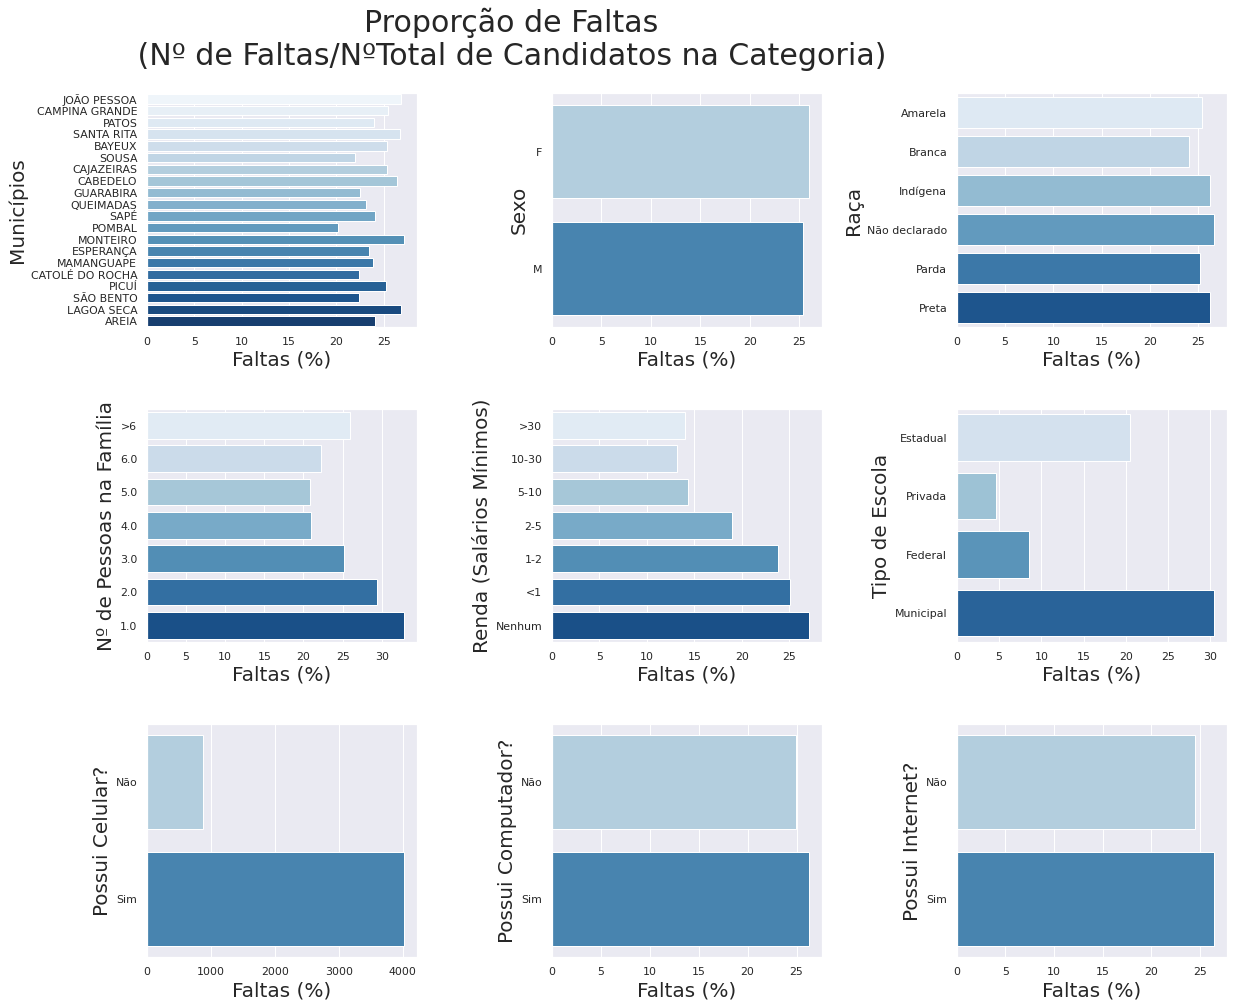

In [63]:
#@title
faltas = dfESCOLA.query('TP_PRESENCA==0')

fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle('  Proporção de Faltas \n (Nº de Faltas/NºTotal de Candidatos na Categoria)', fontsize=30)

# Distancia entre os subplots
plt.subplots_adjust(left=0.3,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)
#MUNICIPIO ==============================================================================================================
total=dfESCOLA.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator
freq.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)


mais_inscritos = freq.head(20)
sns.barplot(ax=axes[0, 0], y ='NO_MUNICIPIO_RESIDENCIA', x ='PorcentagemT', palette = 'Blues', data = mais_inscritos)
axes[0,0].set_xlabel('Faltas (%)', fontsize=20)
axes[0,0].set_ylabel('Municípios', fontsize=20)

#SEXO =================================================================================================================
total=dfESCOLA.groupby(by=['TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

sns.barplot(ax=axes[0, 1], y ='TP_SEXO', x ='PorcentagemT', palette = 'Blues',data = freq)
axes[0,1].set_xlabel('Faltas (%)', fontsize=20)
axes[0,1].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
total=dfESCOLA.groupby(by=['TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator


sns.barplot(ax=axes[0, 2], y ='TP_COR_RACA', x ='PorcentagemT', palette = 'Blues', data = freq)
axes[0,2].set_xlabel('Faltas (%)', fontsize=20)
axes[0,2].set_ylabel('Raça', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
faltas['NP'] = np.where(faltas['NPessoas'] > 6, ">6", faltas['NPessoas'] )
dfESCOLA['NP'] = np.where(dfESCOLA['NPessoas'] > 6, ">6", dfESCOLA['NPessoas'] )

total=dfESCOLA.groupby(by=['NP'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['NP'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='PorcentagemT', palette = 'Blues',order=order, data = freq)
axes[1,0].set_xlabel('Faltas (%)', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
total=dfESCOLA.groupby(by=['Renda'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Renda'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='PorcentagemT', palette = 'Blues',order=order, data = freq)
axes[1,1].set_xlabel('Faltas (%)', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
total=dfESCOLA.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[1, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='PorcentagemT', palette = 'Blues',
            order=order, data = freq)
axes[1,2].set_xlabel('Faltas (%)', fontsize=20)
axes[1,2].set_ylabel('Tipo de Escola', fontsize=20)


#CELULAR ================================================================================================================================
total=dfESCOLA.groupby(by=['Celular'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Celular'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='NU_INSCRICAO', palette = 'Blues', data = freq)
axes[2,0].set_xlabel('Faltas (%)', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
total=dfESCOLA.groupby(by=['Computador'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Computador'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

sns.barplot(ax=axes[2, 1], y ='Computador', x ='PorcentagemT', palette = 'Blues', data = freq)
axes[2,1].set_xlabel('Faltas (%)', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
total=dfESCOLA.groupby(by=['Internet'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Internet'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

sns.barplot(ax=axes[2, 2], y ='Internet', x ='PorcentagemT', palette = 'Blues', data = freq)
axes[2,2].set_xlabel('Faltas (%)', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

In [49]:
intern.dtypes

Computador         object
NU_INSCRICAO      float64
NU_INSCRICAO_T    float64
Porcentagem       float64
dtype: object